In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [36]:
datetime = pd.date_range('2001-01-01', '2004-12-31', freq='D')

xmax = 30.
xmin = -17.

x = 0.5*(xmax-xmin)*(np.sin(np.pi*2*datetime.dayofyear/365. - np.pi*2*81./365.) + 1.) + \
xmin + np.random.randn(datetime.size)*5.

s = pd.Series(x, index=datetime)

In [53]:
myanom = lambda x: x - np.mean(x)
sClim = s.rolling(31, center=True).mean().groupby(s.index.dayofyear).transform(np.mean)
sAnom = s - sClim


In [66]:
def select_season(df, season):
    
    imo = {'DJF': (12,1,2),
           'MAM': (3,4,5),
           'JJA': (6,7,8),
           'SON': (9,10,11)}
    
    return df[(df.index.month == imo[season][0]) | 
                  (df.index.month == imo[season][1]) |
                  (df.index.month == imo[season][2])]    

In [71]:
sdjf = select_season(s, 'DJF')
sdjf
#s[s.index.month == 12]

2001-01-01   -17.200647
2001-01-02   -14.419247
2001-01-03   -16.182738
2001-01-04   -15.274498
2001-01-05   -21.154402
2001-01-06   -16.477320
2001-01-07   -18.052836
2001-01-08   -19.688232
2001-01-09   -19.661615
2001-01-10   -11.252140
2001-01-11   -22.978288
2001-01-12   -14.852588
2001-01-13   -28.552290
2001-01-14   -17.262437
2001-01-15   -15.484912
2001-01-16    -9.117437
2001-01-17   -12.848684
2001-01-18   -11.351029
2001-01-19   -14.656354
2001-01-20   -15.423866
2001-01-21   -14.365849
2001-01-22   -12.678927
2001-01-23    -9.544295
2001-01-24   -14.421452
2001-01-25   -12.967142
2001-01-26   -17.796532
2001-01-27   -11.946572
2001-01-28    -6.728942
2001-01-29    -7.278411
2001-01-30     3.395192
                ...    
2004-12-02   -16.918499
2004-12-03   -12.900589
2004-12-04   -21.626661
2004-12-05   -17.040956
2004-12-06   -21.735280
2004-12-07   -18.954859
2004-12-08   -10.711621
2004-12-09   -19.602283
2004-12-10   -22.434961
2004-12-11   -25.162649
2004-12-12   -14

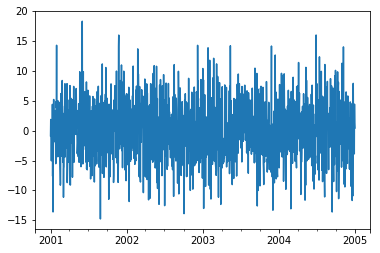

In [55]:
sAnom.plot()

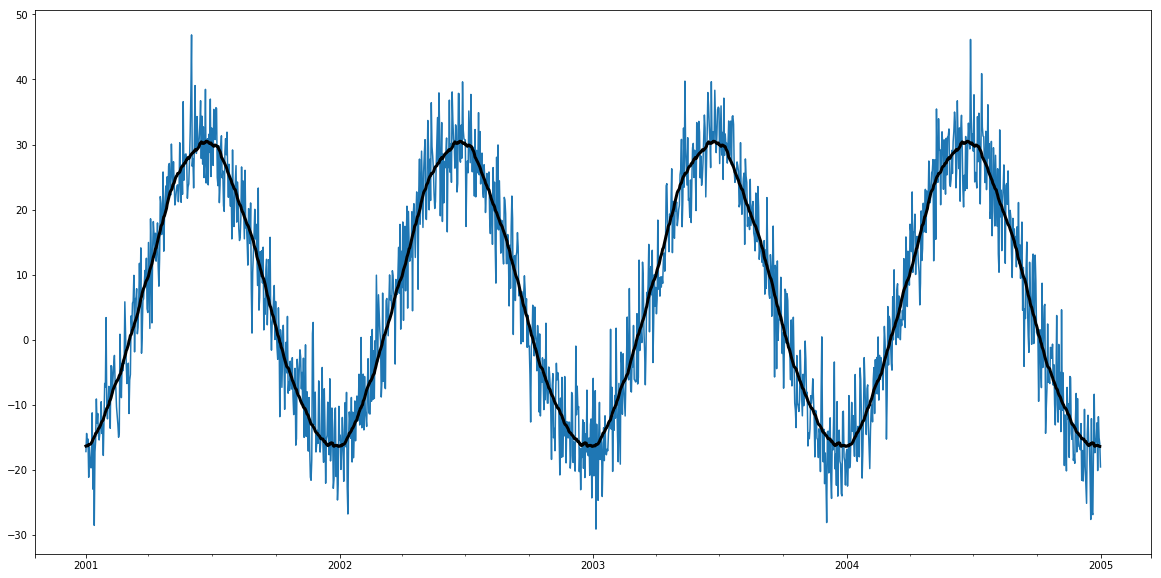

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
s.plot(ax=ax)
#ax.axvline(dt.datetime(2001,6,22))
sClim.plot(ax=ax, lw=3, color='k')